In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras import Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold

from scipy.signal import find_peaks
from scipy.stats import mode
import numpy as np
import pickle
import matplotlib.pyplot as plt

2024-01-19 14:12:09.158088: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
# Load input/label to models
# RESPIRATION
with open('resp_input.pkl', 'rb') as file:
    x = pickle.load(file)
    
with open('resp_label.pkl', 'rb') as file:
    y = pickle.load(file)

# CARDIAC
# with open('cardiac_input.pkl', 'rb') as file:
#     x = pickle.load(file)

# with open('cardiac_label.pkl', 'rb') as file:
#     y = pickle.load(file)
    
# Data normalization
scaler = StandardScaler()
#x = scaler.fit_transform(x)
#x = (scaler.fit_transform(x.T)).T

In [4]:
nanmask = np.isnan(y)
print(f'#Nan Labels: {np.sum(nanmask)}\n#Remaining Samples: {np.sum(~nanmask)}')
y = y[~nanmask]
x = x[~nanmask]

#Nan Labels: 590
#Remaining Samples: 3304


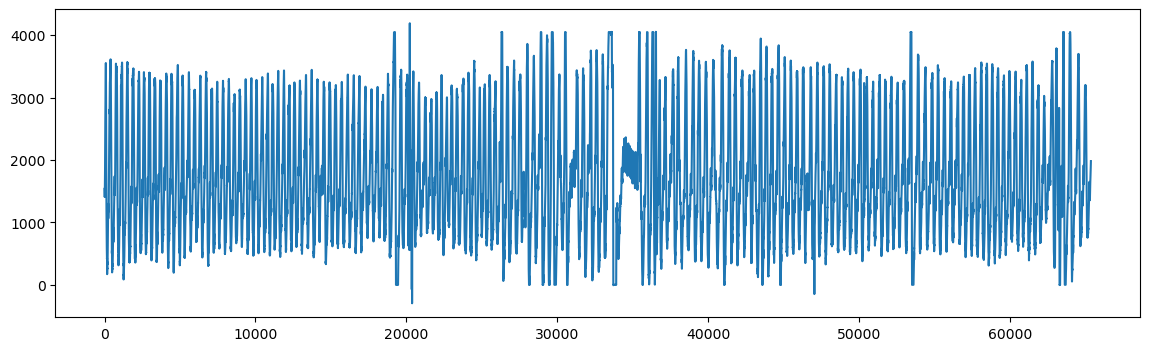

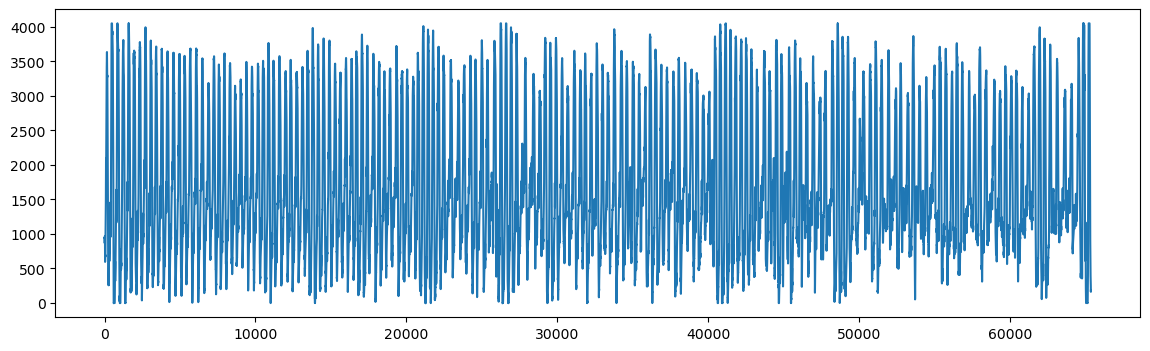

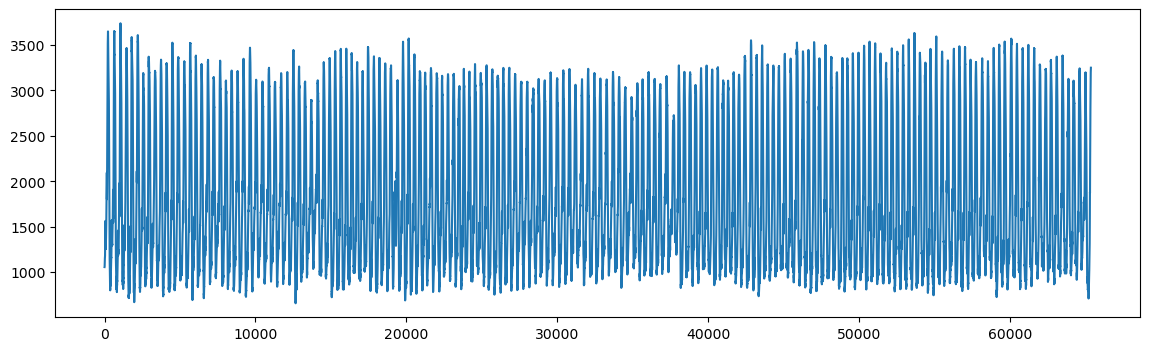

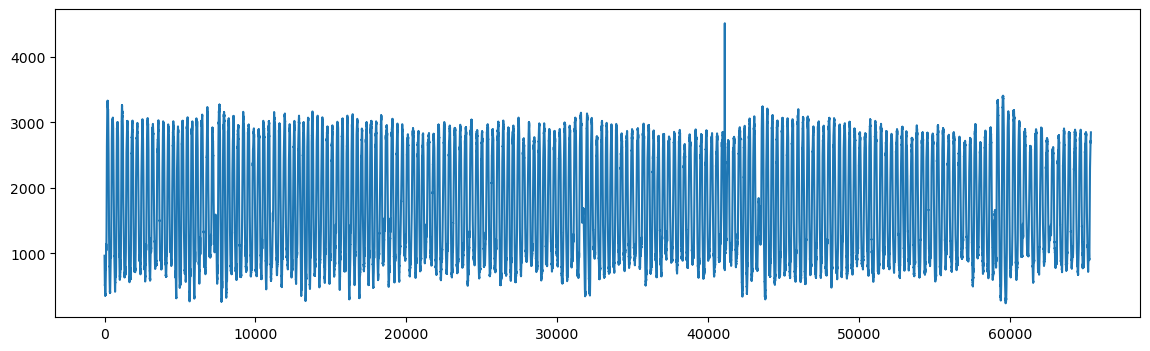

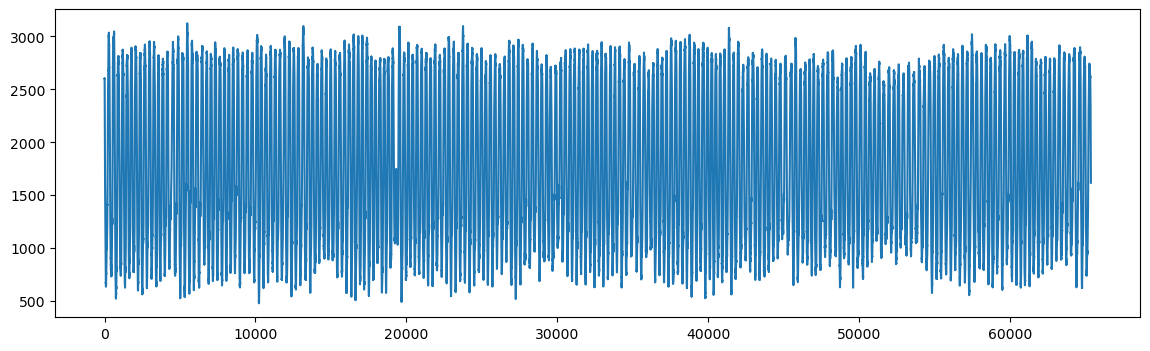

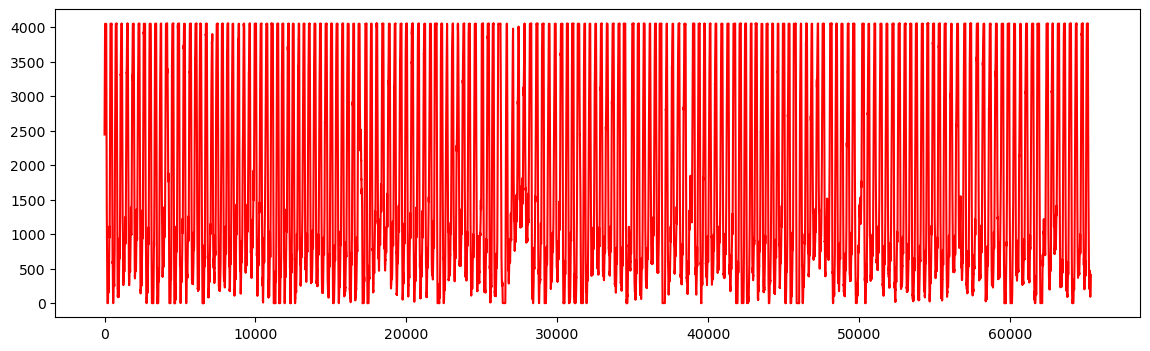

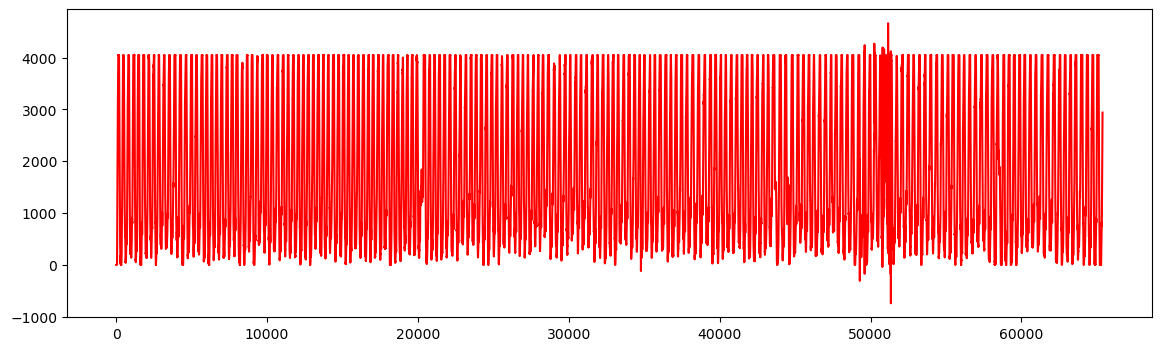

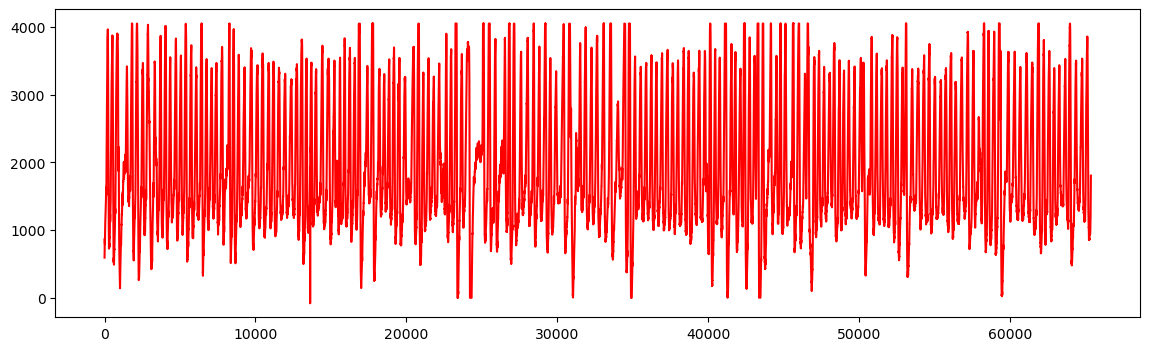

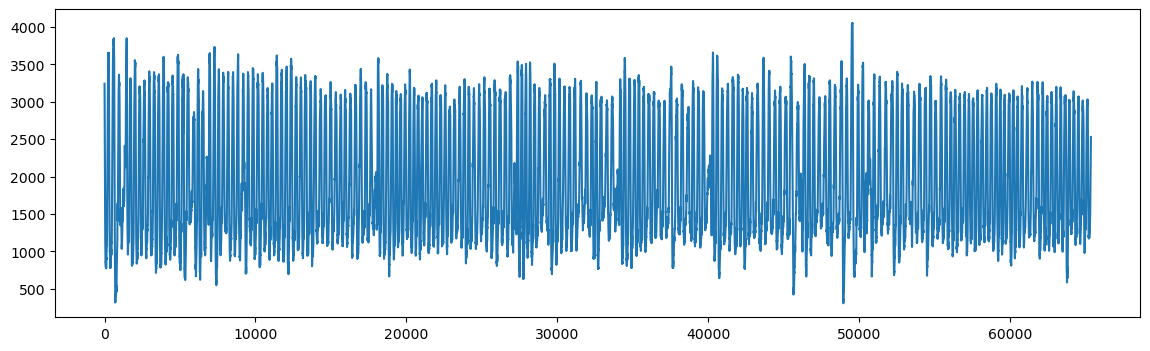

In [5]:
for i in range(0,9):
#for i in range(0,1):
    #i = 31
    plt.figure(figsize=(14,4))
    if (y[i] == 0):
        plt.plot(x[i], color="red")
    else:
        plt.plot(x[i])